In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data_frame = pd.read_csv("res/sample/ratings.csv")
data_frame.set_index(['userId', 'movieId'])
data_frame.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
data_frame_titles = pd.read_csv("res/sample/movies.csv")
data_frame_titles.set_index('movieId')
data_frame_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
data_frame_genres = pd.DataFrame()

for index, row in data_frame_titles.iterrows():
    gdictionary = {
    "movieId": row['movieId'],
    "title": row['title'],
    "Action": False,
    "Adventure": False,
    "Animation": False,
    "Children": False,
    "Comedy": False,
    "Crime": False,
    "Documentary": False,
    "Drama": False,
    "Fantasy": False,
    "Film-Noir": False,
    "Horror": False,
    "IMAX":False,
    "Musical": False,
    "Mystery": False,
    "Romance": False,
    "Sci-Fi": False,
    "Thriller": False,
    "War": False,
    "Western": False }
    
    genres = row['genres'].split("|")
    if "(no genres listed)" not in genres:
        for g in genres:
            gdictionary[g] = True
    
    data_frame_genres = data_frame_genres.append(gdictionary, ignore_index=True)

In [16]:
data_frame = data_frame.merge(data_frame_genres,  on='movieId')
data_frame.head()

,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
0,1,1,4.0,964982703,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
1,5,1,4.0,847434962,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
2,7,1,4.5,1106635946,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
3,15,1,2.5,1510577970,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
4,17,1,4.5,1305696483,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)


In [17]:
data_frame.shape

(100836, 24)

In [18]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 24 columns):
userId         100836 non-null int64
movieId        100836 non-null int64
rating         100836 non-null float64
timestamp      100836 non-null int64
Action         100836 non-null float64
Adventure      100836 non-null float64
Animation      100836 non-null float64
Children       100836 non-null float64
Comedy         100836 non-null float64
Crime          100836 non-null float64
Documentary    100836 non-null float64
Drama          100836 non-null float64
Fantasy        100836 non-null float64
Film-Noir      100836 non-null float64
Horror         100836 non-null float64
IMAX           100836 non-null float64
Musical        100836 non-null float64
Mystery        100836 non-null float64
Romance        100836 non-null float64
Sci-Fi         100836 non-null float64
Thriller       100836 non-null float64
War            100836 non-null float64
Western        100836 non-null float6

In [19]:
data_frame.describe()

,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,...,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557,1.205946e+09,0.303810,0.239607,0.069301,0.091317,0.387292,0.165427,...,0.008628,0.072306,0.041106,0.041037,0.076104,0.179737,0.171000,0.262327,0.048187,0.019140
std,182.618491,35530.987199,1.042529,2.162610e+08,0.459904,0.426846,0.253966,0.288060,0.487134,0.371567,...,0.092485,0.258994,0.198537,0.198377,0.265165,0.383970,0.376511,0.439902,0.214163,0.137018
min,1.000000,1.000000,0.500000,8.281246e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.000000,1199.000000,3.000000,1.019124e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,325.000000,2991.000000,3.500000,1.186087e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,477.000000,8122.000000,4.000000,1.435994e+09,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data_frame.userId.unique()
data_frame.movieId.unique()
data_frame.rating.unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

In [21]:
data_frame.userId.value_counts()
data_frame.movieId.value_counts()
data_frame.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

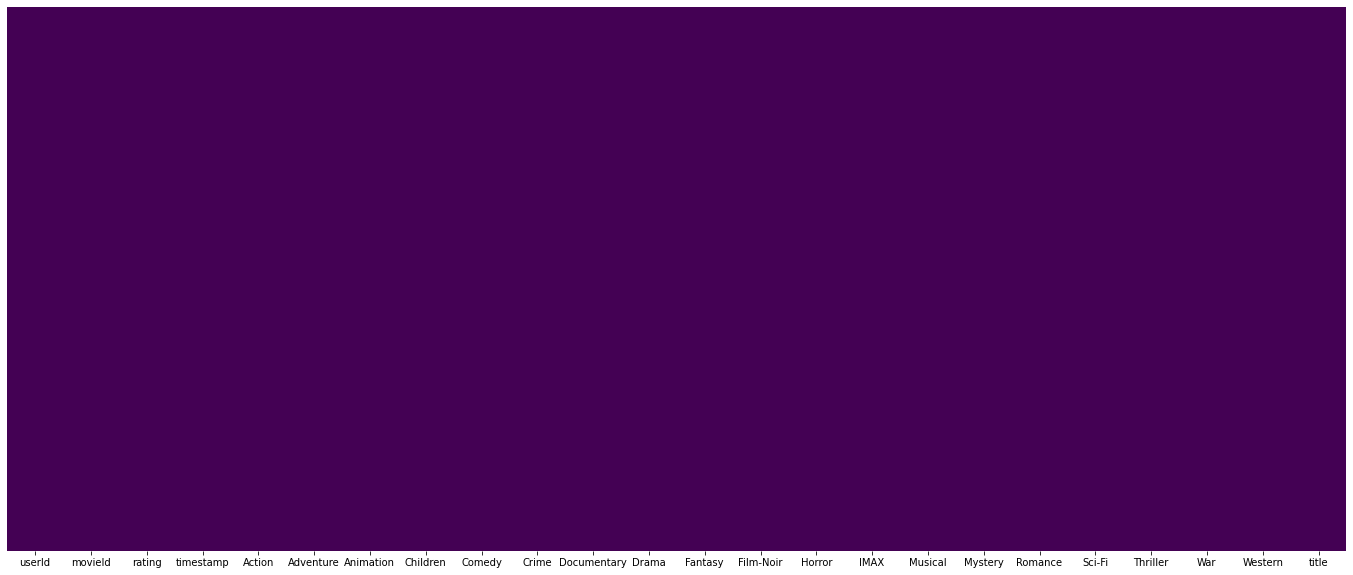

In [23]:
plt.figure(figsize=(24,10))
sns.heatmap(data_frame.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# No missing values in the data set

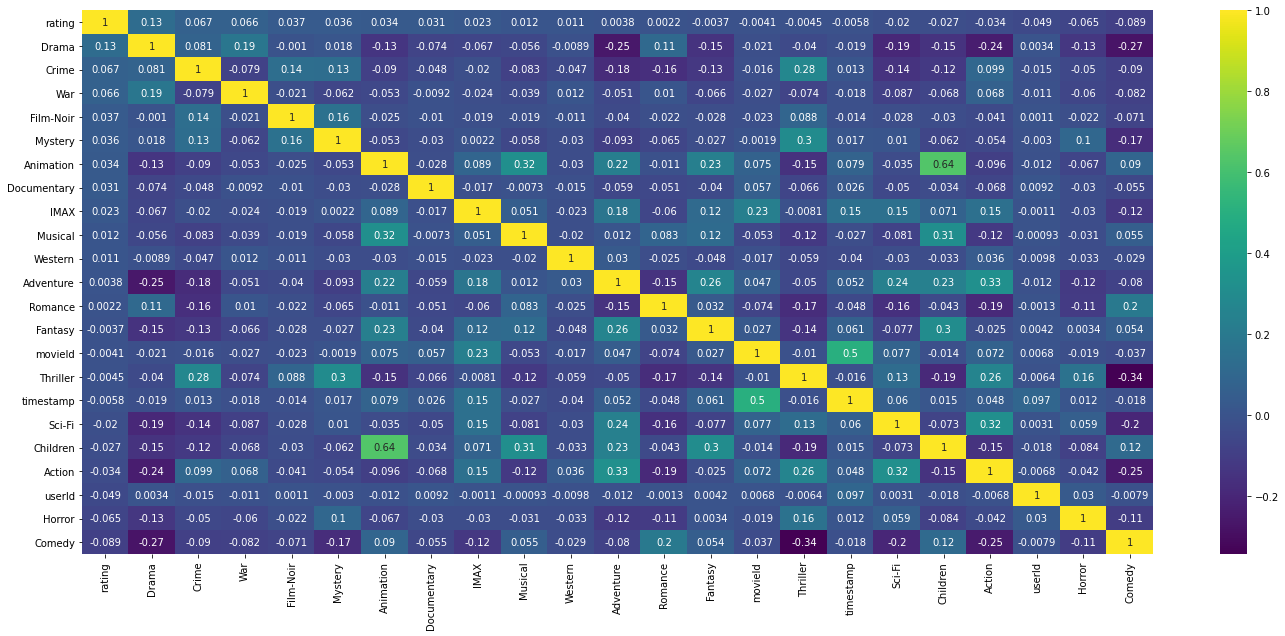

In [24]:
#Quality correlation matrix
dimensions = 24 
cols = data_frame.corr(method ='pearson').nlargest(dimensions, 'rating')['rating'].index

cm = data_frame[cols].corr()
plt.figure(figsize=(24,10))

sns.heatmap(cm, annot=True, cmap = 'viridis')

# Here we can infer that "timestamp" has some positive correlation with "movieId" 
# whereas it has negative correlation with "rating".
# "rating" has almost no correlation with other columns. Since correlation is zero we can infer there
# is no linear relationship between these predictors.However it is safe to drop these features 
# when applying Linear Regression model to the dataset.

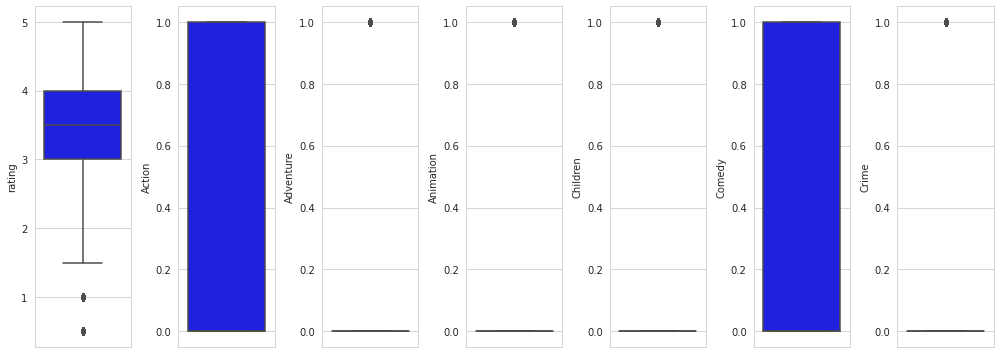

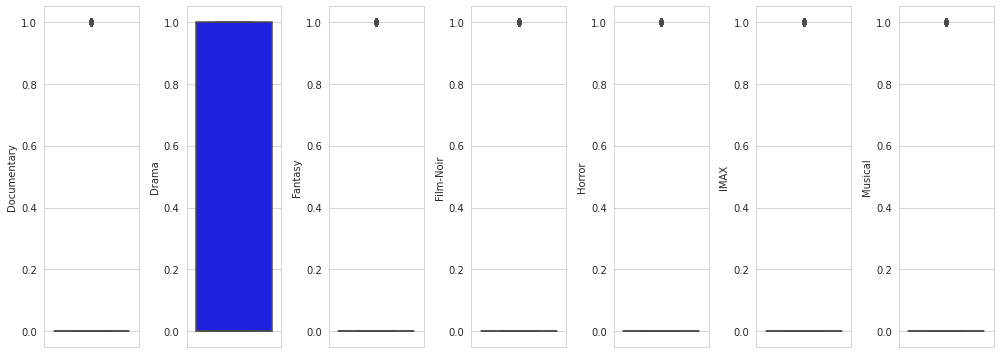

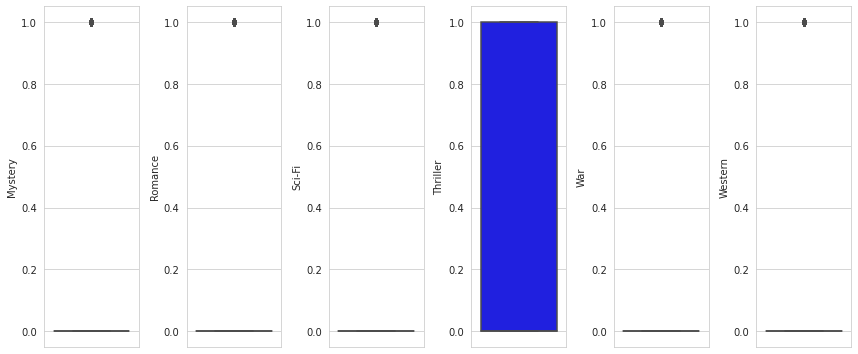

In [57]:
l = data_frame.columns.values[2:10]
index = np.in1d(l, 'timestamp').nonzero()[0]
l = np.delete(l, index)

number_of_columns = l.size
number_of_rows = len(l)-1 / number_of_columns

plt.figure(figsize=(number_of_columns * 2, 5 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    
    sns.set_style('whitegrid')
    sns.boxplot(data_frame[l[i]],color='blue',orient='v')
    
    plt.tight_layout()

    
l = data_frame.columns.values[10:17] 
plt.figure(figsize=(number_of_columns * 2, 5 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    
    sns.set_style('whitegrid')
    sns.boxplot(data_frame[l[i]],color='blue',orient='v')
    
    plt.tight_layout()

l = data_frame.columns.values[17:] 
index = np.in1d(l, 'title').nonzero()[0]
l = np.delete(l, index)

plt.figure(figsize=(number_of_columns * 2, 5 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    
    sns.set_style('whitegrid')
    sns.boxplot(data_frame[l[i]],color='blue',orient='v')
    
    plt.tight_layout()

# userId and timestamp do not have any outliers

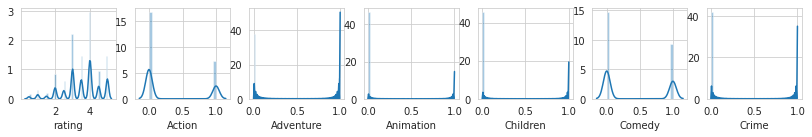

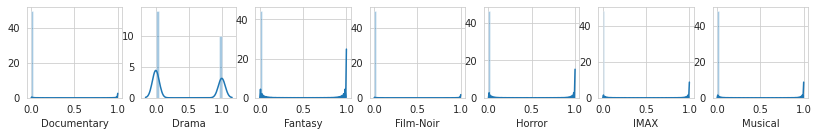

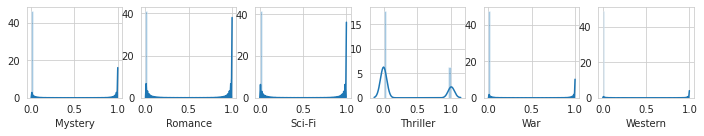

In [56]:
l = data_frame.select_dtypes(include=np.number).columns[2:10]
index = np.in1d(l, 'timestamp').nonzero()[0]
l = np.delete(l, index)

number_of_columns = l.size
number_of_rows = len(l)-1 / number_of_columns

plt.figure(figsize=(number_of_columns * 2, 2 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns, i+1)
    sns.distplot(data_frame[l[i]],kde=True)
    
l = data_frame.columns.values[10:17] 
plt.figure(figsize=(number_of_columns * 2, 2 * number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns, i+1)
    sns.distplot(data_frame[l[i]],kde=True)

l = data_frame.select_dtypes(include=np.number).columns[17:]
plt.figure(figsize=(number_of_columns * 2, 2 * number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns, i+1)
    sns.distplot(data_frame[l[i]],kde=True)
    
# None of columns appears to be normally distributed
# All are independent variables positively skewed

Preview of data:


,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
0,1,1,4.0,964982703,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
1,5,1,4.0,847434962,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)
2,7,1,4.5,1106635946,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Toy Story (1995)



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 24 columns):
userId         100836 non-null int64
movieId        100836 non-null int64
rating         100836 non-null float64
timestamp      100836 non-null int64
Action         100836 non-null float64
Adventure      100836 non-null float64
Animation      100836 non-null float64
Children       100836 non-null float64
Comedy         100836 non-null float64
Crime          100836 non-null float64
Documentary    100836 non-null float64
Drama          100836 non-null float64
Fantasy        100836 non-null float64
Film-Noir      100836 non-null float64
Horror         100836 non-null float64
IMAX           100836 non-null float64
Musical        100836 non-null float64
Mystery        100836 non-null float64
Romance        100836 non-null float64
Sci-Fi         100836 non-null float64
Thriller       100836 non-null f

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09
Action,100836.0,3.038101e-01,4.599039e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Adventure,100836.0,2.396069e-01,4.268457e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Animation,100836.0,6.930065e-02,2.539660e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Children,100836.0,9.131659e-02,2.880602e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Comedy,100836.0,3.872922e-01,4.871338e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Crime,100836.0,1.654270e-01,3.715674e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


/ilab/users/sdb202/.local/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


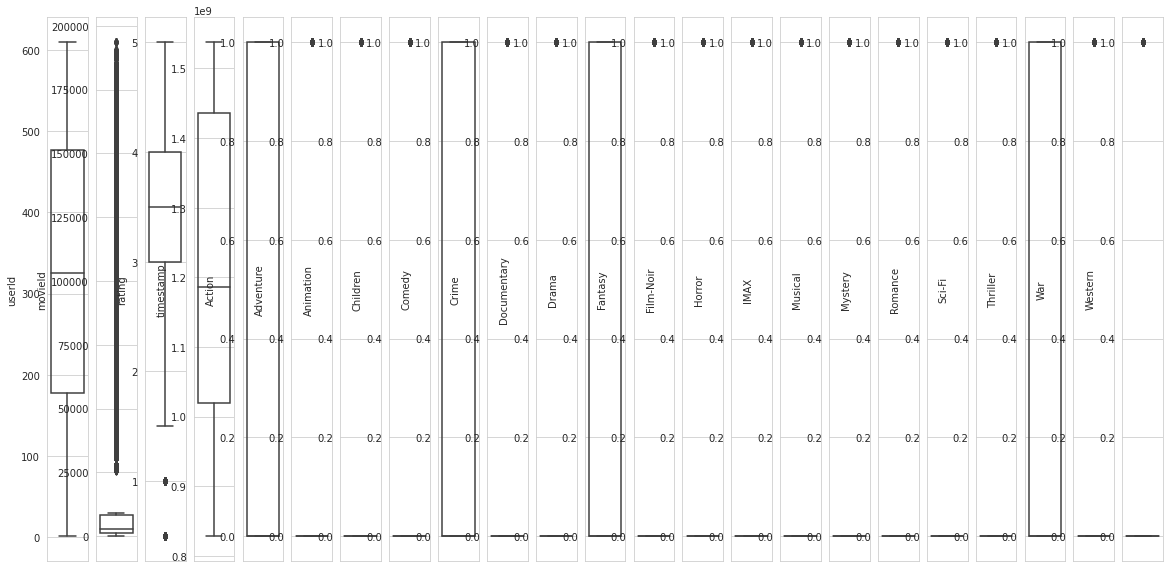


To check pairwise joint distribution of numeric data


In [ ]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df, hue='rating')
    
    # EDA of numeric data
    numeric_eda(df)
        
eda(data_frame)